In [7]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### <font color='purple'> 1) Let's first work with a small simple dataset just to see the visualization. </font>

In [8]:
df = pd.read_csv(r"C:\Users\lasth\Desktop\jupyter_folder_main\all files for jupyter, pandas\income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [9]:
df.shape

(22, 3)

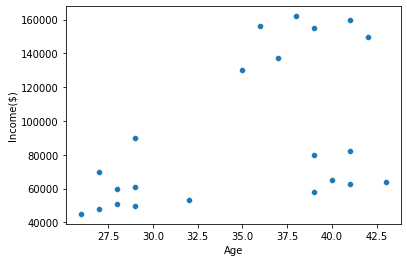

In [10]:
# From the graph we can see 3 main clusters.
sns.scatterplot(x=df['Age'], y=df['Income($)'])
plt.show()

In [11]:
# Since we already know the number of clusters, we can specify it in our model right away.
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
# Finding predicted clusters.
k_predicted = km.fit_predict(df[['Age','Income($)']])
k_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [13]:
# Adding predicted clusters to our DataFrame.
df['cluster'] = k_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [14]:
# location of our centroids.
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

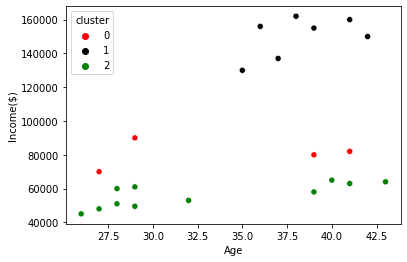

In [15]:
# As we can see our two clusters at the bottom are identified wrongly.
sns.scatterplot(data=df, x='Age', y='Income($)', hue='cluster', palette=['r', 'black', 'g'])
plt.show()

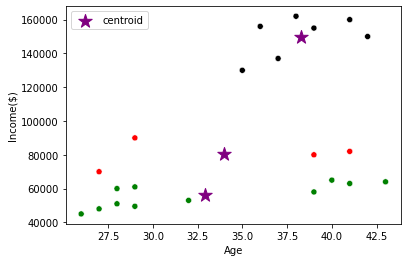

In [16]:
# We added centroids in our plot to see their position and also to see why points were grouped wrongly.
sns.scatterplot(data=df, x='Age', y='Income($)', hue='cluster', palette=['r', 'black', 'g'], legend=False)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid', s=200)

plt.legend()
plt.show()

In [17]:
# The problem occurred because our values have different scales.
# In the next step we will scale the data and repeat the same process.

### <span style='color:purple'> Preprocessing data using Min Max Scaler </span> 

In [18]:
scaler = MinMaxScaler()
df[['Age', 'Income($)']] = scaler.fit_transform(df[['Age', 'Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [19]:
km = KMeans(n_clusters=3)
k_predicted = km.fit_predict(df[['Age','Income($)']])
k_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [20]:
# Rewriting our 'cluster' column with new scaled predicted values.
df['cluster'] = k_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [21]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

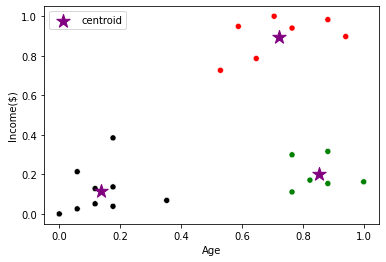

In [22]:
# Now our clusters are identified correctly.
sns.scatterplot(data=df, x='Age', y='Income($)', hue='cluster', palette=['r', 'black', 'g'], legend=False)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid', s=200)

plt.legend()
plt.show()

In [23]:
# Usually, when we don't know the number of clusters, we create a 'for' loop to go through random number of possible clusters.
sse = []  # sse: sum of squared errors
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)    # inertia_ - sum of squared distances of samples to their closest cluster center (SSE).

In [24]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.22020960864009398,
 0.1685851223602976,
 0.1397684499538816,
 0.10383752586603562]

### <font color='purple'> A good model is one with low inertia (SSE) AND a low number of clusters (K).  </font>

In [25]:
# Plotting the 'Elbow graph'. This technique helps to find an optimal number of clusters.

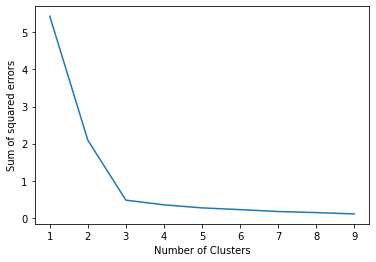

In [26]:
# According to Elbow technique our optimal number is 3.
plt.plot(k_rng, sse)

plt.xlabel('Number of Clusters')   
plt.ylabel('Sum of squared errors')
plt.show()

### 2) Let's work with a bigger dataset.

In [27]:
from sklearn.datasets import load_iris

<div>
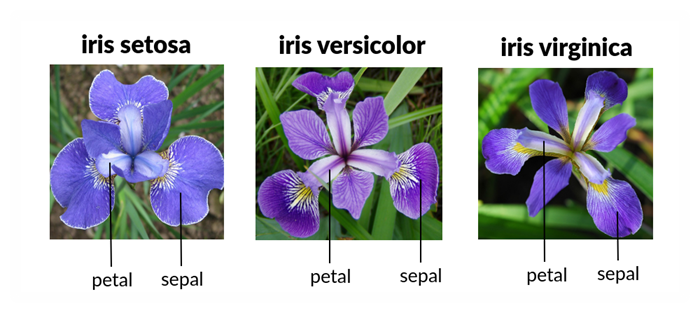
</div>

<div>
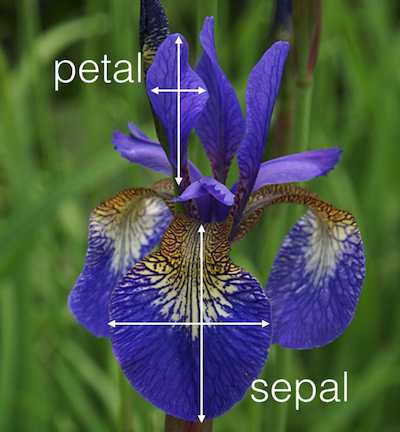
</div>

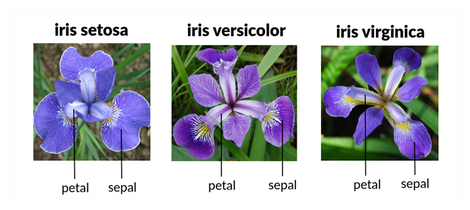

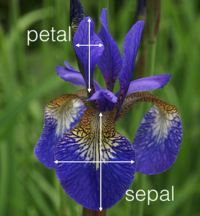

In [28]:
iris = load_iris()

In [29]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [30]:
# We already know, that there are free types of flowers (clusters) in this dataset.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
# Converting iris data into a DataFrame.
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
scaler = MinMaxScaler()

In [33]:
scaled_iris = scaler.fit_transform(iris_df)

In [34]:
iris_df = pd.DataFrame(scaled_iris, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [35]:
# Createing a loop to find an optimal number of clusters.
sse = []  # sse: sum of squared errors
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(iris_df)
    sse.append(km.inertia_) 

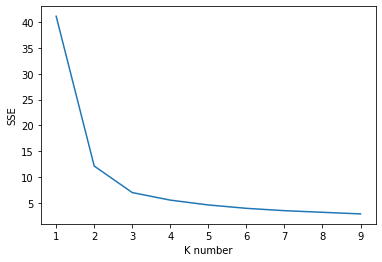

In [36]:
# We can see that 3 clusters are indeed an optimal number.
plt.plot(k_rng, sse)

plt.xlabel('K number')
plt.ylabel('SSE')
plt.show()

### We could actually skip creating a DataFrame.

In [37]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_iris)
    sse.append(km.inertia_) 

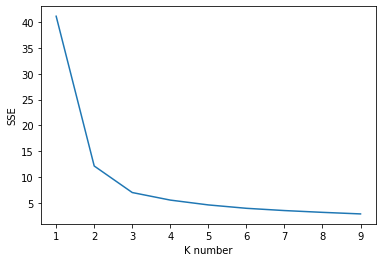

In [38]:
# And we got the same result:  K=3.
plt.plot(k_rng, sse)

plt.xlabel('K number')
plt.ylabel('SSE')
plt.show()

In [39]:
# Applying our K-means algorithm.
km = KMeans(n_clusters=3, random_state=4)

In [40]:
k_predict = km.fit_predict(scaled_iris)
k_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [41]:
# Since we actually know the allocation of our clusters (target values) we can compare them with our predicted clusters.
# After comparing these two sets, we can conclude the following:
# Note* The integers are different, but it doesn't matter, because 'order' isn't import here.
# The first group of clusters (first 50 values) are absolutely the same, which means it chose values correctly.
# The second group has identified 3 values wrong.
# The last group of clusters identified 14 values wrong.
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
# 3 values are wrong here.
k_predict[50:100]

array([0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [43]:
# 14 values are identified wrong.
k_predict[100:150]

array([0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 2])

### 3) Let's drop two columns (features) from the iris dataset in order to visualize it.

In [44]:
# The dataset is scaled already.
iris_df.drop(['petal length (cm)', 'petal width (cm)'], axis='columns', inplace=True)
iris_df

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667
...,...,...
145,0.666667,0.416667
146,0.555556,0.208333
147,0.611111,0.416667
148,0.527778,0.583333


In [45]:
km = KMeans(n_clusters=3)
k_predicted = km.fit_predict(iris_df)
k_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [46]:
iris_df['clusters'] = k_predicted
iris_df

,sepal length (cm),sepal width (cm),clusters
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0
...,...,...,...
145,0.666667,0.416667,2
146,0.555556,0.208333,1
147,0.611111,0.416667,2
148,0.527778,0.583333,2


In [47]:
km.cluster_centers_

array([[0.19897959, 0.60459184],
       [0.40483539, 0.28009259],
       [0.69562648, 0.45390071]])

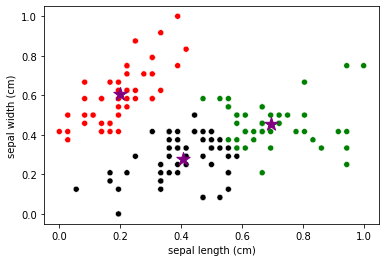

In [48]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', 
                hue='clusters', palette=['r', 'black', 'g'], legend=False)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', s=200)
plt.show()

In [49]:
from yellowbrick.cluster import KElbowVisualizer
# special method for the same visualization of Elbow technique.

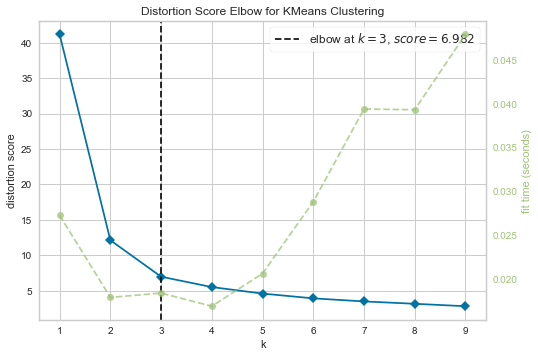

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10))
visualizer.fit(scaled_iris)
visualizer.show()
plt.show()